In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#1.1: STEP 1

pd.read_csv(r"C:\Users\garci\Downloads\GlobalLandTemperaturesByState.csv")
df = pd.read_csv(r"C:\Users\garci\Downloads\GlobalLandTemperaturesByState.csv")

In [5]:
#1.1: STEP 2
new_df = df.iloc[:, [0, 1, 3]].copy()
print(new_df)

                dt  AverageTemperature     State
0       1855-05-01              25.544      Acre
1       1855-06-01              24.228      Acre
2       1855-07-01              24.371      Acre
3       1855-08-01              25.427      Acre
4       1855-09-01              25.675      Acre
...            ...                 ...       ...
645670  2013-05-01              21.634  Zhejiang
645671  2013-06-01              24.679  Zhejiang
645672  2013-07-01              29.272  Zhejiang
645673  2013-08-01              29.202  Zhejiang
645674  2013-09-01                 NaN  Zhejiang

[645675 rows x 3 columns]


In [7]:
#1.1:STEP 3
new_df['dt'] = pd.to_datetime(new_df['dt'])
new_df = new_df[new_df['dt'].dt.year >2000]
print(new_df)

               dt  AverageTemperature     State
1748   2001-01-01              25.743      Acre
1749   2001-02-01              26.087      Acre
1750   2001-03-01              26.139      Acre
1751   2001-04-01              26.366      Acre
1752   2001-05-01              25.660      Acre
...           ...                 ...       ...
645670 2013-05-01              21.634  Zhejiang
645671 2013-06-01              24.679  Zhejiang
645672 2013-07-01              29.272  Zhejiang
645673 2013-08-01              29.202  Zhejiang
645674 2013-09-01                 NaN  Zhejiang

[36873 rows x 3 columns]


In [9]:
#1.1: STEP 4
states = ['Wyoming', 'Nebraska', 'South Dakota']
new_df = new_df[new_df['State'].isin(states)]
print(new_df.shape)


(459, 3)


In [11]:
#1.2
avgtempbydate = new_df.groupby('dt')['AverageTemperature'].mean().reset_index()
avgtempbydate.columns = ['Date', 'AverageTemperature']
print(avgtempbydate.head())


        Date  AverageTemperature
0 2001-01-01           -4.480333
1 2001-02-01           -7.541000
2 2001-03-01            0.590333
3 2001-04-01            7.889000
4 2001-05-01           13.908667


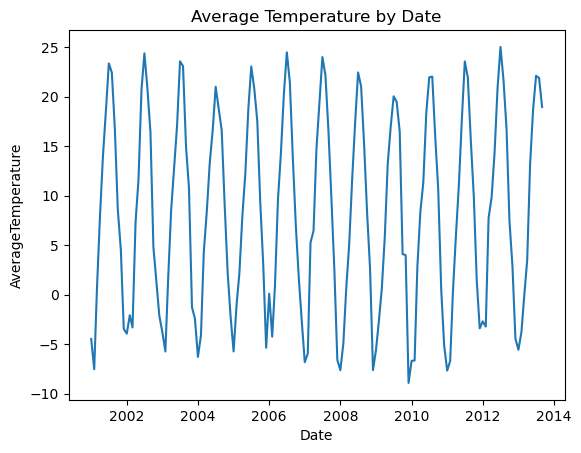

In [27]:
#1.3
plt.figure()
plt.plot(avgtempbydate['Date'], avgtempbydate['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('AverageTemperature')
plt.title('Average Temperature by Date')
plt.show()


In [35]:
#1.4
avgtempbydate['Date'] = pd.to_datetime(avgtempbydate['Date'])
start_date = avgtempbydate['Date'].min()
avgtempbydate['DateNumeric'] = (avgtempbydate['Date'] - start_date).dt.total_seconds() / (24 * 3600)


In [47]:
#1.5
def model(x, A, B, C, D):
    return A * np.cos( B * x + C) + D
A_guess = (avgtempbydate['AverageTemperature'].max() - avgtempbydate['AverageTemperature'].min())/2
B_guess = 2 * np.pi / 365
C_guess = 0 
D_guess = avgtempbydate['AverageTemperature'].mean()

initial_guess = np.array([A_guess, B_guess, C_guess, D_guess])

In [49]:
from scipy.optimize import curve_fit

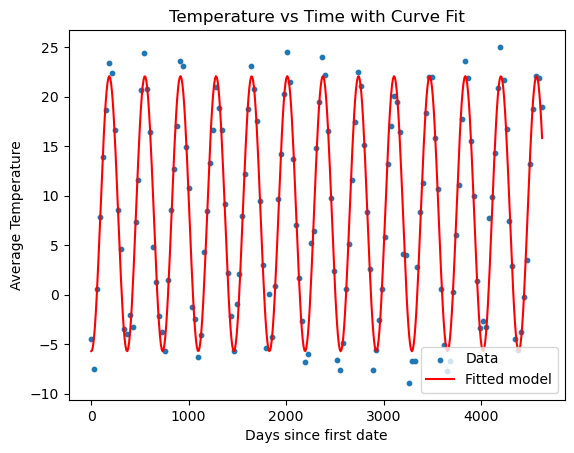

In [55]:
#1.6
params, cov = curve_fit(
    model,
    avgtempbydate['DateNumeric'],
    avgtempbydate['AverageTemperature'],
    p0= initial_guess)


#1.7


x_fit = np.linspace(avgtempbydate['DateNumeric'].min(), avgtempbydate['DateNumeric'].max(), 500)
y_fit = model(x_fit, *params)

plt.figure()
plt.scatter(avgtempbydate['DateNumeric'], avgtempbydate['AverageTemperature'], label='Data', s=10)

plt.plot(x_fit, y_fit, color='red', label='Fitted model')

plt.xlabel('Days since first date')
plt.ylabel('Average Temperature')
plt.title('Temperature vs Time with Curve Fit')
plt.legend()
plt.show()

In [57]:
#1.8
errors = np.sqrt(np.diag(cov))

In [63]:
#1.9
param_names = ['A', 'B', 'C', 'D']
for name, value, error in zip(param_names, params, errors):
    print(f"{name} = {value:.4f} ± {error:.4f}")


A = -13.8983 ± 0.2265
B = 0.0172 ± 0.0000
C = -0.0465 ± 0.0328
D = 8.1749 ± 0.1607


In [65]:
print(f"\nFinal fitted equation:")
print(f"y = {params[0]:.4f} * cos({params[1]:.4f} * x + {params[2]:.4f}) + {params[3]:.4f}")



Final fitted equation:
y = -13.8983 * cos(0.0172 * x + -0.0465) + 8.1749


   CCl4ottoyr  CCl4ottomon  CCl4ottoNHm  CCl4ottoNHsd  CCl4ottoSHm  \
0        2005            4       95.647         0.126       93.773   
1        2005            5       95.706         0.098       93.503   
2        2005            6       95.508         0.140       93.419   
3        2005            7       95.311         0.116       93.173   
4        2005            8       95.095         0.105       93.244   

   CCl4ottoSHsd  CCl4ottoGLm  CCl4ottoGLsd  
0         0.151       94.710         0.098  
1         0.141       94.605         0.087  
2         0.126       94.464         0.095  
3         0.121       94.242         0.082  
4         0.173       94.169         0.104  
Index(['CCl4ottoyr', 'CCl4ottomon', 'CCl4ottoNHm', 'CCl4ottoNHsd',
       'CCl4ottoSHm', 'CCl4ottoSHsd', 'CCl4ottoGLm', 'CCl4ottoGLsd'],
      dtype='object')


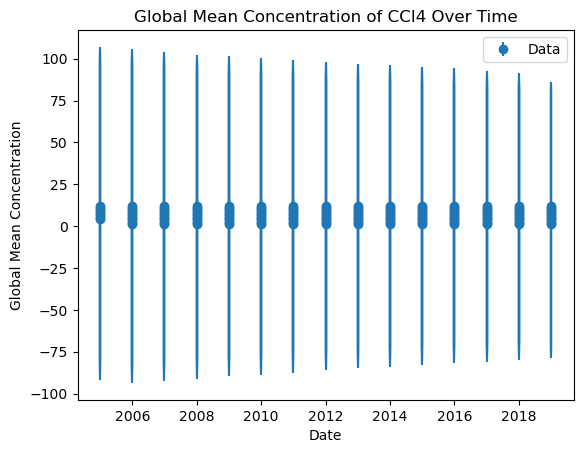

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [113]:
#1.10
from astropy.table import Table
from scipy.optimize import curve_fit

data = Table.read(r"C:\Users\garci\Downloads\global_CCl4_MM.dat", format='ascii', data_start=112)

df = data.to_pandas()

print(df.head())  
print(df.columns)  

df.columns = ['CCl4ottoyr', 'CCl4ottoGLm', 'CCl4ottoGLsd', 'ExtraCol1', 'ExtraCol2', 'ExtraCol3', 'ExtraCol4', 'ExtraCol5']

df = df[['CCl4ottoyr', 'CCl4ottoGLm', 'CCl4ottoGLsd']]

plt.errorbar(df['CCl4ottoyr'], df['CCl4ottoGLm'], yerr=df['CCl4ottoGLsd'], fmt='o', label='Data')
plt.xlabel('Date')
plt.ylabel('Global Mean Concentration')
plt.title('Global Mean Concentration of CCl4 Over Time')
plt.legend()
plt.show()

def linear_model(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear_model, df['CCl4ottoyr'], df['CCl4ottoGLm'], sigma=df['CCl4ottoGLsd'])

a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))

residuals = df['CCl4ottoGLm'] - linear_model(df['CCl4ottoyr'], *popt)
chi_squared = np.sum((residuals / df['CCl4ottoGLsd'])**2)
reduced_chi_squared = chi_squared / (len(df) - 2)  # degrees of freedom = len(data) - number of parameters

print(f"Linear fit parameters:")
print(f"Slope (a): {a:.4f} ± {a_err:.4f}")
print(f"Intercept (b): {b:.4f} ± {b_err:.4f}")
print(f"Final equation: y = {a:.4f}x + {b:.4f}")
print(f"Reduced Chi-squared: {reduced_chi_squared:.4f}")


